#### ポアソン分布とは？

ポアソン分布は、ある間隔（時間や長さなど）の間に起こるイベントの回数に注目するものです。
まずは、その定義をみたあとに、その式の意味するところを噛み砕いていくことにしましょう。

離散確率変数Xが、パラメータλを持つポアソン分布に従うとき、k=0,1,2.., に対応する確率を生成する確率質量関数は、次の式で与えられます。

$$Pr(X=k)=\frac{\lambda^ke^{-\lambda}}{k!}$$

eは自然対数の底（ネイピア数）で、e=2.718...となる数です。k!はkの階乗。      

ポアソン分布には、次のような性質があります。

    1.) 離散的です。(x=0,1,2,3...)
    2.) この数は、0から無限大までの値を取り得ます。
    3.) あまり頻繁には起こらない事象の確率分布を表現します。
    4.) それぞれの事象は独立です。
    5.) 時間や距離などの間隔で起きる事象について記述します。
    6.) 事象が起きる回数の期待値は定数です。

例を見てみましょう。

マクドナルドのランチのピークは、12:30から1:00の間です。これまでの経験から、平均で10人のお客さんが、この時間帯に来店することが分かっています。それでは、ちょうど7人のお客さんが来店する確率はどれくらいでしょうか？また、10人より多いお客さんが来る確率はどれくらいでしょうか？

これまでの経験から、お昼のピーク30分間に、10人のお客さんが来ることがわかっています。この10は平均値、つまり期待値です。これはポアソン分布のパラメータλに相当します。

ポアソン分布はλが決まれば、決まりますので、この例題に答えることができます。やってみましょう。

In [2]:
# 残念ながら、lambdaはPythonでは予約語なので、そのまま変数名には使えます。

# lambとして、λをセットします。
lamb = 10

# ちょうど7人来る確率を計算したいので、k=7です。
k=7

# 標準mathモジュールから、必要なモノをインポート
from math import exp
from math import factorial
#Python2を使っているなら
from __future__ import division

# 確率質量関数をつかって確率を計算します。
prob = (lamb**k)*exp(-lamb)/factorial(k)

print(' 昼のピーク時にお客さんが7人である確率は、{:0.2f}%です。'.format(100*prob))

 昼のピーク時にお客さんが7人である確率は、9.01%です。


確率質量関数を手作りできました。scipyを使うともう少し楽です。

In [20]:
# scipy.statsから、 poissonをインポートします
from scipy.stats import poisson

# 平均は10です。
mu = 10

# 平均と分散を計算できます。
mean,var = poisson.stats(mu)

# 確率質量関数を使って、特定の確率を計算することも可能です。
odds_seven = poisson.pmf(7,mu)

print('ピーク時に7人の確率は{:0.2f}％'.format(odds_seven*100))

print('平均={}'.format(mean))

ピーク時に7人の確率は9.01％
平均=10.0


分布の全体を見ておくことにします。これは、10人よりお客が多い確率を求めるのに必要です。

In [14]:
# 確率質量関数をプロットしてみましょう。

import numpy as np

# ひとまず、30人のお客さんが来る確率です。理論的には無限大まであり得ます。
k=np.arange(30)

# 平均は10です。
lamb = 10

# これで確率を計算できます。
pmf_pois = poisson.pmf(k,lamb)
pmf_pois

array([  4.53999298e-05,   4.53999298e-04,   2.26999649e-03,
         7.56665496e-03,   1.89166374e-02,   3.78332748e-02,
         6.30554580e-02,   9.00792257e-02,   1.12599032e-01,
         1.25110036e-01,   1.25110036e-01,   1.13736396e-01,
         9.47803301e-02,   7.29079462e-02,   5.20771044e-02,
         3.47180696e-02,   2.16987935e-02,   1.27639962e-02,
         7.09110899e-03,   3.73216263e-03,   1.86608131e-03,
         8.88610150e-04,   4.03913704e-04,   1.75614654e-04,
         7.31727725e-05,   2.92691090e-05,   1.12573496e-05,
         4.16938875e-06,   1.48906741e-06,   5.13471521e-07])

<Container object of 30 artists>

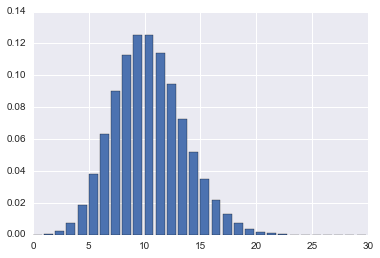

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


plt.bar(k,pmf_pois)

10人より多くのお客さんがくる確率はどれくらいでしょうか？

これは、11人以降の確率の値をすべて足し合わせれば良いわけですが、これを実現するのが、累積分布関数（CDF: Cumulative Distribution Function）です。

累積分布関数は、指定された値までの確率を足し合わせた値を返してくれます。

In [19]:
# お客さんが10人までの確率を計算するので、k = 10です。平均値もおなじく10
k,mu = 10,10

# お客さんが10人までの確率を次のコードで計算できます。
prob_up_to_ten = poisson.cdf(k,mu)

print('お客さんが10人までの確率は、{:0.2f}%です。'.format(100*prob_up_to_ten))

お客さんが10人までの確率は、58.30%です。


10により多く来る確率は、1からこの値を引くだけです。

In [18]:
prob_more_than_ten = 1 - prob_up_to_ten

print('10人より多くのお客さんが来る確率は、{:0.2f}%です。'.format(100*prob_more_than_ten))

10人より多くのお客さんが来る確率は、41.70%です。


-----

ポアソン分布の基本的なことを解説しました。
以下の資料も参考にしてみてください。

1.)https://ja.wikipedia.org/wiki/%E3%83%9D%E3%82%A2%E3%82%BD%E3%83%B3%E5%88%86%E5%B8%83

2.)http://stattrek.com/probability-distributions/poisson.aspx

3.)http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html